<a href="https://colab.research.google.com/github/claredavies/ImageAnalysisAssignment/blob/main/ImageAnalysisAssignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Libraries

In [30]:
import cv2
import numpy as np
import dlib
from google.colab import files
import io
import pandas as pd
import os
from os import listdir
import glob
import cv2
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# Read in files

In [15]:
!git clone https://github.com/claredavies/ImageAnalysisAssignment.git

Cloning into 'ImageAnalysisAssignment'...
remote: Enumerating objects: 52, done.
remote: Counting objects: 100% (52/52), done.
remote: Compressing objects: 100% (45/45), done.
remote: Total 52 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (52/52), done.


In [16]:
%cd ImageAnalysisAssignment/Assignment1Data

/content/ImageAnalysisAssignment/Assignment1Data/ImageAnalysisAssignment/Assignment1Data


Read in labels

In [17]:
labels = pd.read_csv('Labels/people-labels.csv')
labels.head(3)

,Label,X,Y,Filename,Width,Height
0,Person,317,563,1660194000.jpg,1920,1080
1,Person,248,564,1660194000.jpg,1920,1080
2,Person,266,576,1660194000.jpg,1920,1080


How many people labelled in each file

In [19]:
labelsPerFile = labels.groupby(['Filename'])['Filename'].count()
print(labelsPerFile)

Filename
1660194000.jpg     4
1660197600.jpg     4
1660201200.jpg    12
1660204800.jpg    15
1660208400.jpg    16
1660212000.jpg    35
1660215600.jpg    65
1660219200.jpg    31
1660222800.jpg    18
1660226400.jpg    45
Name: Filename, dtype: int64


Read in images

In [14]:
# get the path/directory
folder_dir = "images"
for images in os.listdir(folder_dir):
 
    # check if the image ends with png
    if (images.endswith(".jpg")):
        print(images)

1660197600.jpg
1660226400.jpg
1660201200.jpg
1660219200.jpg
1660194000.jpg
1660204800.jpg
1660208400.jpg
1660215600.jpg
1660222800.jpg
1660212000.jpg


Algorithm design and implementation to i) identify every person and ii) count the number of
people in every photograph.

# Image Averaging

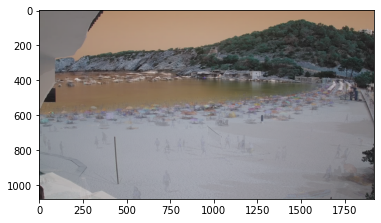

In [21]:
# import all image files with the .jpg extension
images = glob.glob ("images/*.jpg")


image_data = []
for img in images:
    this_image = cv2.imread(img, 1)
    image_data.append(this_image)

avg_image = image_data[0]
for i in range(len(image_data)):
    if i == 0:
        pass
    else:
        alpha = 1.0/(i + 1)
        beta = 1.0 - alpha
        avg_image = cv2.addWeighted(image_data[i], alpha, avg_image, beta, 0.0)

cv2.imwrite('avg.png', avg_image)
avg_image = cv2.imread('avg.png')
plt.imshow(avg_image)
plt.show()

# Pre-processing - Histogram equalization/CLAHE

In [38]:
def improve_contrast_image_using_clahe(img: np.ndarray) -> np.array:
  image = cv2.resize(img, (500, 600))
 
  # The initial processing of the image
  # image = cv2.medianBlur(image, 3)
  image_bw = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  
  # The declaration of CLAHE
  # clipLimit -> Threshold for contrast limiting
  clahe = cv2.createCLAHE(clipLimit = 5)
  final_img = clahe.apply(image_bw) + 30
  
  # Ordinary thresholding the same image
  _, ordinary_img = cv2.threshold(image_bw, 155, 255, cv2.THRESH_BINARY)
  return final_img

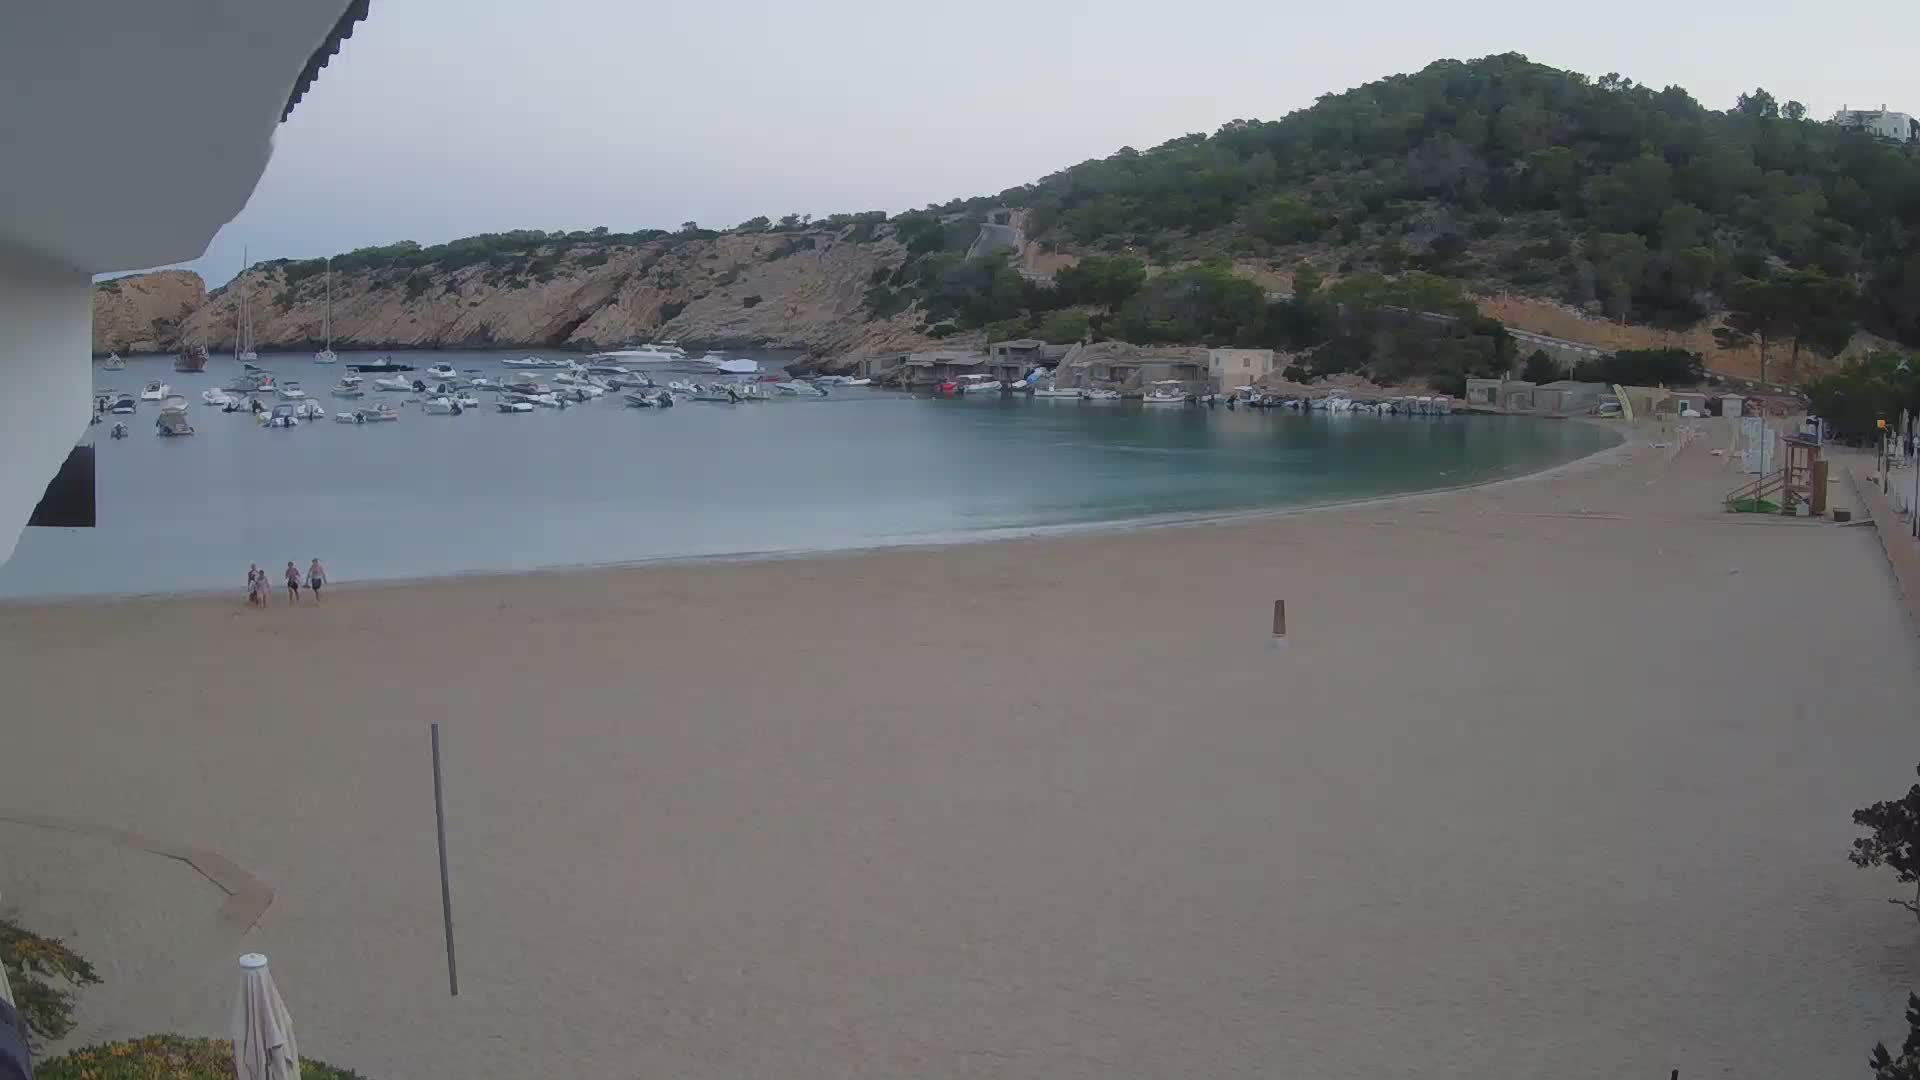

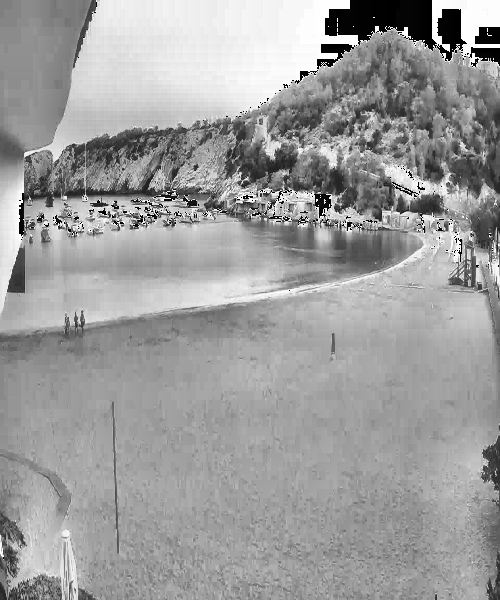

-1

In [39]:
bgr_image = cv2.imread('images/1660194000.jpg') 

result = improve_contrast_image_using_clahe(bgr_image)

cv2_imshow(bgr_image)
cv2_imshow(result)
cv2.waitKey(0)

# Pre-processing Spatial Filters

# Kernels specifically designed for crowd counting